In [1]:
# !pip install 'pymc3 ==3.8'
# !pip install 'arviz ==0.8.3'

     |████████████████████████████████| 911kB 4.9MB/s 
     |████████████████████████████████| 1.5MB 30.4MB/s 
     |████████████████████████████████| 4.3MB 36.0MB/s 
     |████████████████████████████████| 296kB 35.3MB/s 
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7
     |████████████████████████████████| 1.5MB 4.7MB/s 
  Found existing installation: arviz 0.9.0
    Uninstalling arviz-0.9.0:
      Successfully uninstalled arviz-0.9.0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.interpolate import  griddata
import seaborn as sns
import arviz as az
import pymc3 as pm
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import  StandardScaler
sns.set()
np.random.seed(1)
plt.style.use('fivethirtyeight')

/Users/roysu001/opt/anaconda3/lib/python3.8/site-packages/theano/configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Code 4.1 and Figure 4.2

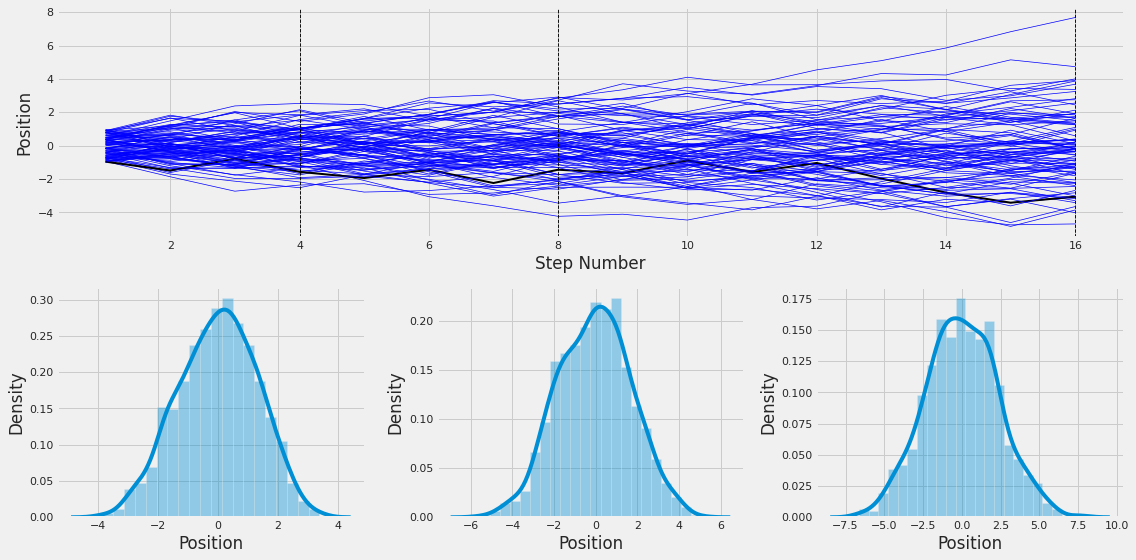

In [3]:
pos=np.random.uniform(-1, 1, size=(16, 1000))

fig = plt.figure(tight_layout=True,figsize=(16,8))
gs = gridspec.GridSpec(2, 3)
ax = fig.add_subplot(gs[0, :])

for i in range(100):
  if i==50:

    sns.lineplot(x=range(1,17),y=pos[:,i].cumsum(),ax=ax,color ='black',linewidth=2)
  else:
    sns.lineplot(x=range(1,17),y=pos[:,i].cumsum(),ax=ax,color ='blue',linewidth=0.7)
ax.axvline(4,color='black',linewidth = 0.9,linestyle ='--')
ax.axvline(8,color='black',linewidth = 0.9,linestyle ='--')
ax.axvline(16,color='black',linewidth = 0.9,linestyle ='--')
ax.set_xlabel('Step Number')
ax.set_ylabel('Position')

ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])  
ax3 = fig.add_subplot(gs[1,2])                  
sns.distplot(pos.cumsum(axis=0)[4,:],ax=ax1)
sns.distplot(pos.cumsum(axis=0)[8,:],ax=ax2)
sns.distplot(pos.cumsum(axis=0)[15,:],ax=ax3)
ax1.set_xlabel('Position')
ax1.set_ylabel('Density')

ax2.set_xlabel('Position')
ax2.set_ylabel('Density')

ax3.set_xlabel('Position')
ax3.set_ylabel('Density')
fig.show()

### Code 4.2

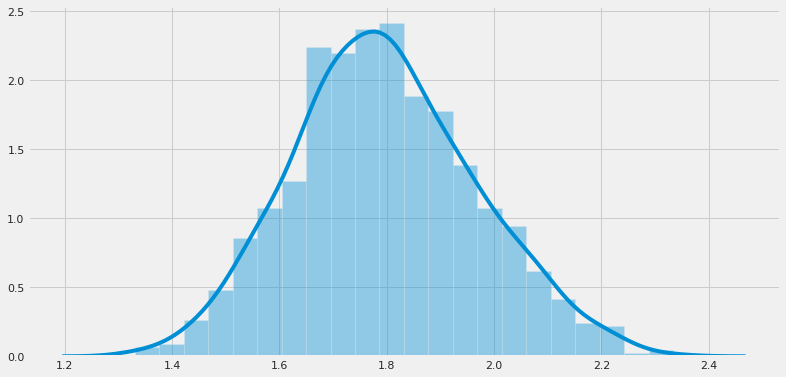

In [4]:
growth = np.prod(np.random.uniform(0,0.1,size =(12,1000)) + 1,axis=0)

fig,axs = plt.subplots(1,1, figsize = (12,6))
sns.distplot(growth,ax=axs)
fig.show()


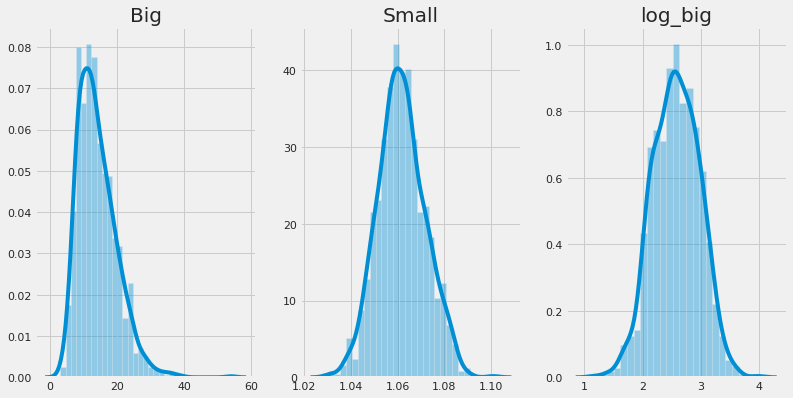

In [5]:
big = np.prod(np.random.uniform(0,0.5,size =(12,1000)) + 1,axis=0)
small = np.prod(np.random.uniform(0,0.01,size =(12,1000)) + 1,axis=0)
log_big = np.log(big)


fig,axs = plt.subplots(1,3, figsize = (12,6))
sns.distplot(big,ax=axs[0])
axs[0].set_title('Big')
sns.distplot(small,ax=axs[1])
axs[1].set_title('Small')

sns.distplot(log_big,ax=axs[2])
axs[2].set_title('log_big')
fig.show()

### Code 4.6


In [6]:
w = 6
n = 9
p_grid = np.linspace(0,1,100)
posterior = stats.binom.pmf(w,n,p_grid) * stats.uniform.pdf(p_grid,0,1)
posterior = posterior/np.sum(posterior)

In [7]:
url = 'https://raw.githubusercontent.com/pymc-devs/resources/master/Rethinking/Data/Howell1.csv'
d = pd.read_csv(url,sep=';', header=0)
d.head(5)

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


### Code 4.7

In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB


### Code 4.9

In [9]:
d.height.head()

0    151.765
1    139.700
2    136.525
3    156.845
4    145.415
Name: height, dtype: float64

### Code 4.10

In [10]:
d2 = d[d.age >= 18].copy()
print(d2.shape)

(352, 4)


### Code for looking at height

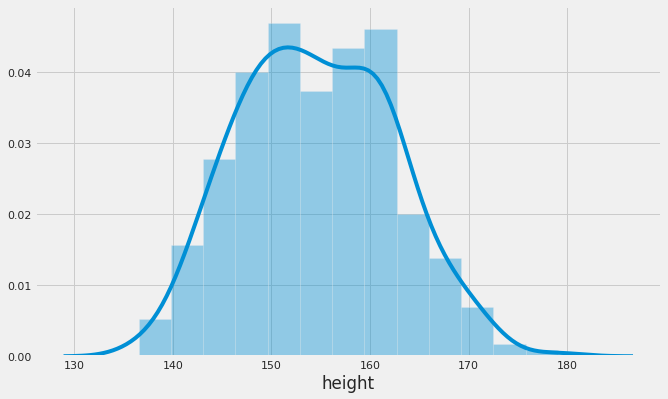

In [11]:
fig, axs = plt.subplots(1,1,figsize= (10,6))
sns.distplot(d2.height,ax=axs)
fig.show()

### Code 4.11 and 4.12

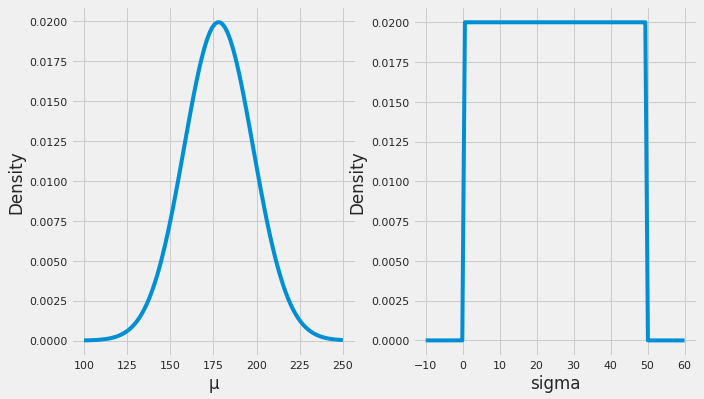

In [12]:
fig,axs = plt.subplots(1,2, figsize =(10,6))
x = np.linspace(100,250,100)
sns.lineplot(x,stats.norm.pdf(x,178,20),ax = axs[0])
axs[0].set_xlabel('μ')
axs[0].set_ylabel('Density')

x = np.linspace(-10,60,100)
sns.lineplot(x,stats.uniform.pdf(x,0,50),ax = axs[1])
axs[1].set_xlabel('sigma')
axs[1].set_ylabel('Density')
fig.show()

### Code 4.13

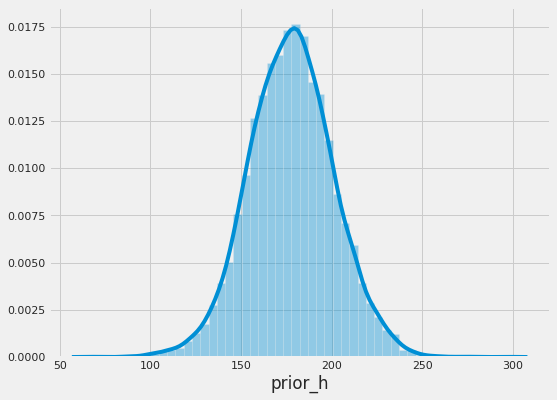

In [13]:
sample_mu = stats.norm.rvs(178,20, int(1e4))
sample_sigma = stats.uniform.rvs(0,20, int(1e4))
prior_h = stats.norm.rvs(sample_mu,sample_sigma)

fig,axs = plt.subplots(1,1, figsize = (8,6))
sns.distplot(prior_h,ax=axs,  hist =True)
axs.set_xlabel('prior_h')
fig.show()

### Code 4.14


In [14]:
mu = np.linspace(140,160,200)
sigma = np.linspace(4,9, 200)
post = np.array(np.meshgrid(mu,sigma)).reshape(2,-1).T

# likelihood = [sum(stats.norm.logpdf(d2.height, loc=post[:,0][i], scale=post[:,1][i])) for i in range(len(post))]
likelihood = np.sum(np.stack(d2.height.map(lambda x: stats.norm.logpdf(x,loc=post[:,0], scale = post[:,1]))),axis=0)

post_prod = likelihood + stats.norm.logpdf(post[:,0], loc=178,scale=20) + stats.uniform.logpdf(post[:,1], loc=0, scale=50)
post_prob = np.exp(post_prod - np.max(post_prod))

### Code 4.15

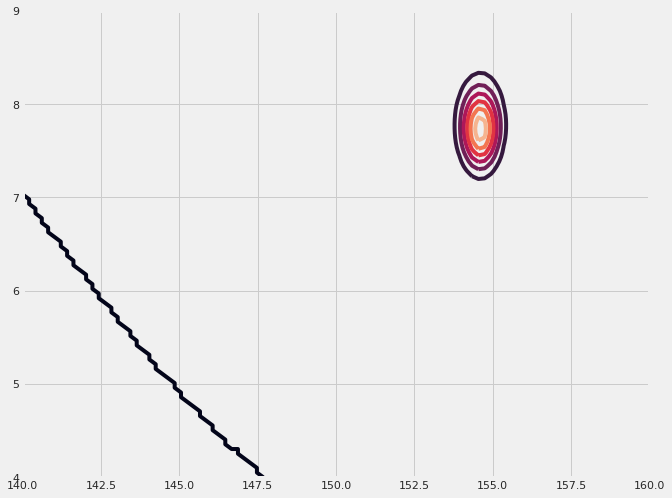

In [15]:
xi = np.linspace(post[:,0].min(), post[:,0].max(), 100)
yi = np.linspace(post[:,1].min(), post[:,1].max(), 100)
zi = griddata(post, post_prob, np.array(np.meshgrid(xi,yi)).reshape(2,-1).T)

fig,axs = plt.subplots(1,1,figsize = (10,8))
axs.contour(xi,yi,zi.reshape(100,100))
fig.show()


### Code 4.17 and Code 4.18

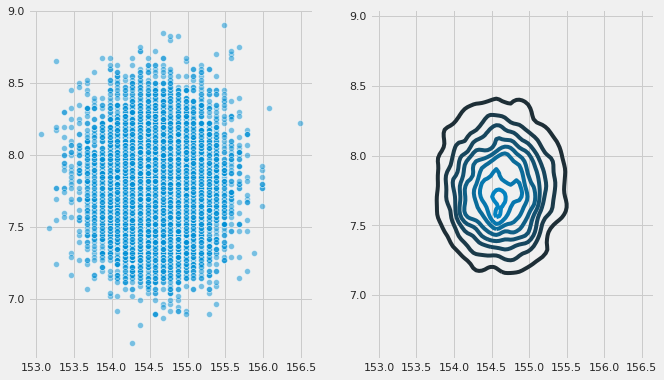

In [16]:
sample_rows = np.random.choice(post_prob.shape[0],size=int(1e4),p= post_prob/np.sum(post_prob))

sample_mu = post[sample_rows,0]
sample_sigma = post[sample_rows,1]

fig,axs = plt.subplots(1,2, figsize = (10,6))
sns.scatterplot(sample_mu,sample_sigma,marker='o',alpha=0.5,ax=axs[0])
sns.kdeplot(sample_mu,sample_sigma,ax=axs[1])
fig.show()


### Code 4.19

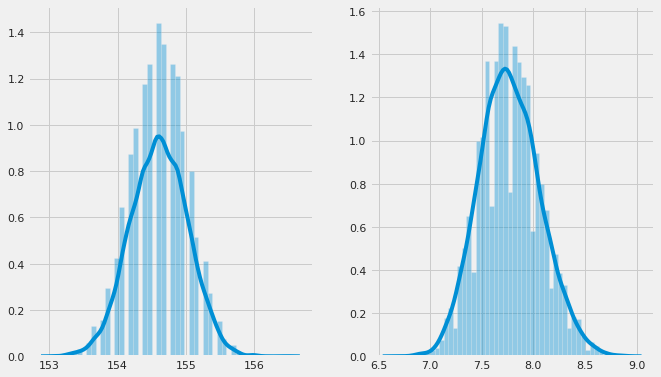

In [17]:
fig,axs = plt.subplots(1,2, figsize = (10,6))
sns.distplot(sample_mu,ax=axs[0])
sns.distplot(sample_sigma,ax=axs[1])
fig.show()

### Code 4.20

In [18]:
print('90% HDI for sample mu',az.hdi(sample_mu,hdi_prob=0.9))
print('90% HDI for sample sigma',az.hdi(sample_sigma,hdi_prob=0.9))

90% HDI for sample mu [153.86934673 155.1758794 ]
90% HDI for sample sigma [7.26633166 8.22110553]


### Code 4.21

In [19]:
d3 = d2.sample(20,random_state=1)

### Code 4.22

In [20]:
mu_list = np.linspace(150,170,200)
sigma_list = np.linspace(4,20, 200)
post2 = np.array(np.meshgrid(mu_list,sigma_list)).reshape(2,-1).T
likelihood2 = np.sum(np.stack(d3.height.map(lambda x: stats.norm.logpdf(x,loc=post[:,0], scale = post2[:,1]))),axis=0)
post_prod2 = likelihood2 + stats.norm.logpdf(post2[:,0], loc=178,scale=20) + stats.uniform.logpdf(post2[:,1], loc=0, scale=50)
post_prob2 = np.exp(post_prod2 - np.max(post_prod2))
sample_rows2 = np.random.choice(post_prob2.shape[0],size=int(1e4),p= post_prob2/np.sum(post_prob2))
sample2_mu = post2[sample_rows2,0]
sample2_sigma = post2[sample_rows2,1]

### Code 4.23

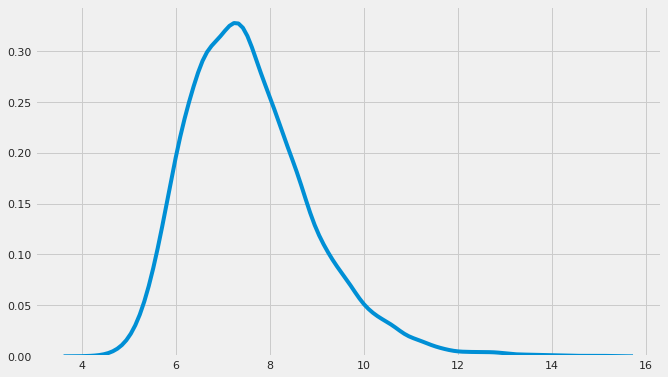

In [21]:
fig,axs = plt.subplots(1,1, figsize = (10,6))
sns.distplot(sample2_sigma,ax=axs,hist=False)
fig.show()

### Code 4.24

In [22]:
url = 'https://raw.githubusercontent.com/pymc-devs/resources/master/Rethinking/Data/Howell1.csv'
d = pd.read_csv(url,sep=';', header=0)
display(d.head(5))
d2 = d[d.age >= 18]

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


### Code 4.25 and Code 4.26
The following code is just for illustration purpose. We will be using pymc3 sampler.

In [23]:

with pm.Model() as normal_approximation:
  mu_model = pm.Normal('mu_model',mu = 178, sigma = 20)
  sigma_model = pm.Uniform('sigma_model',0,50)
  height = pm.Normal('height',mu = mu_model,sigma = sigma_model, observed = d2.height)
  mean_model = pm.find_MAP()
  variance_model = ((1/pm.find_hessian(mean_model, vars=[mu_model,sigma_model])))

logp = -1,235.2, ||grad|| = 11.697: 100%|██████████| 19/19 [00:00<00:00, 918.90it/s]  


In [24]:
norm = stats.norm(mean_model['mu_model'],np.sqrt(variance_model[0,0]))
prob = 0.89
z = stats.norm.ppf([(1-prob)/2, (1+prob)/2])
ci = mean_model['mu_model'] + np.sqrt(variance_model[0,0]) * z 
print('mean and std dev for mu_model are',mean_model['mu_model'],np.sqrt(variance_model[0,0]))
print('mu_model {prob} internval'.format(prob=prob),ci)


norm = stats.norm(mean_model['sigma_model'],np.sqrt(variance_model[1,1]))
prob = 0.89
z = stats.norm.ppf([(1-prob)/2, (1+prob)/2])
ci = mean_model['sigma_model'] + np.sqrt(variance_model[1,1]) * z 

print('mean and std dev for sigma_model are',mean_model['sigma_model'],np.sqrt(variance_model[1,1]))
print('mu_model {prob} internval'.format(prob=prob),ci)


mean and std dev for mu_model are 154.60702358123825 0.41199399266738285
mu_model 0.89 internval [153.94857761 155.26546955]
mean and std dev for sigma_model are 7.731333025102713 0.29138557484355165
mu_model 0.89 internval [7.2656426  8.19702345]


### Code 4.25

In [25]:
with pm.Model() as m4_1:
  mu_model = pm.Normal('mu_model',mu = 178, sigma = 20)
  sigma_model = pm.Uniform('sigma_model',0,50)
  height = pm.Normal('height',mu = mu_model,sigma = sigma_model, observed = d2.height)

with m4_1:
  trace_4_1 = pm.sample(1000,tune=1000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma_model, mu_model]
Sampling chain 1, 0 divergences: 100%|██████████| 2000/2000 [00:01<00:00, 1337.55it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ae162bac8>,
      dtype=object)

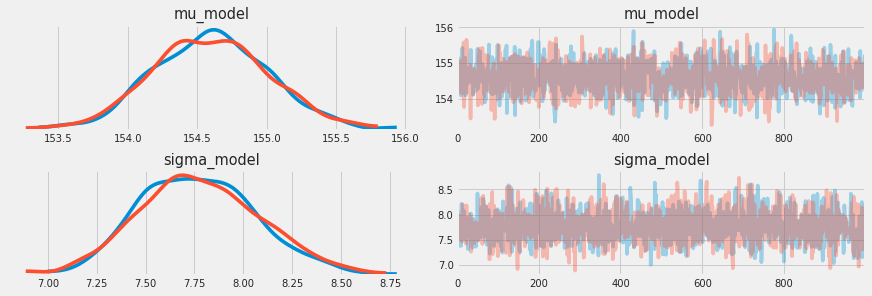

In [26]:
az.plot_trace(trace_4_1)

### Code 4.27 

In [27]:
df=az.summary(trace_4_1,hdi_prob=0.89).round(2)
df.iloc[:,0:4]

,mean,sd,hdi_5.5%,hdi_94.5%
mu_model,154.60,0.42,153.93,155.22
sigma_model,7.78,0.30,7.31,8.27


#### Code 4.28

In [28]:
with pm.Model() as m4_1:
  mu_model = pm.Normal('mu_model',mu = 178, sigma = 20,testval = d2.height.mean())
  sigma_model = pm.Uniform('sigma_model',0,50, testval = d2.height.std())
  height = pm.Normal('height',mu = mu_model,sigma = sigma_model, observed = d2.height)
  trace_4_1 = pm.sample(1000,tune=1000)
df=az.summary(trace_4_1,hdi_prob=0.89).round(2)
df.iloc[:,0:4]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma_model, mu_model]
Sampling chain 1, 0 divergences: 100%|██████████| 2000/2000 [00:01<00:00, 1293.61it/s]


,mean,sd,hdi_5.5%,hdi_94.5%
mu_model,154.62,0.42,154.01,155.32
sigma_model,7.76,0.30,7.30,8.25


### Code 4.29

In [29]:
with pm.Model() as m4_2:
  mu_model = pm.Normal('mu_model',mu = 178, sigma = 0.1)
  sigma_model = pm.Uniform('sigma_model',0,50)
  height = pm.Normal('height',mu = mu_model,sigma = sigma_model, observed = d2.height)
  trace_4_2 = pm.sample(1000,tune=1000)

df=az.summary(trace_4_2,hdi_prob=0.89).round(2)
df.iloc[:,0:4]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma_model, mu_model]
Sampling chain 1, 0 divergences: 100%|██████████| 2000/2000 [00:01<00:00, 1356.48it/s]


,mean,sd,hdi_5.5%,hdi_94.5%
mu_model,177.86,0.10,177.72,178.03
sigma_model,24.63,0.96,23.09,26.14


### Code 4.30

In [30]:
df_trace_4_1 = pm.trace_to_dataframe(trace_4_1)
df_trace_4_1.cov()

,mu_model,sigma_model
mu_model,0.179868,0.004133
sigma_model,0.004133,0.090918


### Code 4.31

In [31]:
display(np.diag(df_trace_4_1.cov()))
display(df_trace_4_1.corr())

array([0.1798683 , 0.09091755])

,mu_model,sigma_model
mu_model,1.00000,0.03232
sigma_model,0.03232,1.00000


### Code 4.32 and 4.33

In [32]:
df_trace_4_1.head()

,mu_model,sigma_model
0,154.300231,7.893584
1,154.200716,7.947965
2,154.596260,7.567277
3,154.760470,7.852592
4,154.760470,7.852592


### Code 4.34

In [33]:
post = stats.multivariate_normal.rvs(df_trace_4_1.mean(),cov = df_trace_4_1.corr(),size = int(1e4),random_state=1 )
post.shape

(10000, 2)

### Code 4.35

In [34]:
with pm.Model() as m4_1_logsigma:
  mu_model = pm.Normal('mu_model',mu = 178, sigma = 20)
  log_sigma_model = pm.Normal('log_sigma_model',mu = 2,sigma = 10)
  height = pm.Normal('height',mu = mu_model,sigma = np.exp(log_sigma_model), observed = d2.height)
  trace_4_1_logsigma = pm.sample(1000,tune=1000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [log_sigma_model, mu_model]
Sampling chain 1, 0 divergences: 100%|██████████| 2000/2000 [00:01<00:00, 1330.51it/s]


### Code 4.36

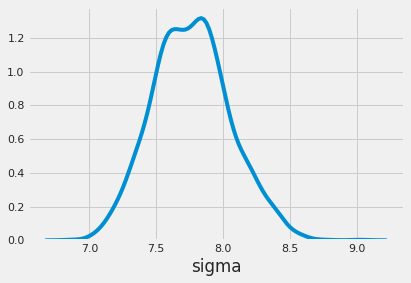

In [35]:
df_trace_4_1_logsigma = pm.trace_to_dataframe(trace_4_1_logsigma)
sigma = np.exp(df_trace_4_1_logsigma.log_sigma_model)

fig,ax = plt.subplots(1,1,figsize = (6,4))
sns.distplot(sigma,ax=ax, hist=False)
ax.set_xlabel('sigma')
fig.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ae1735e48>,
      dtype=object)

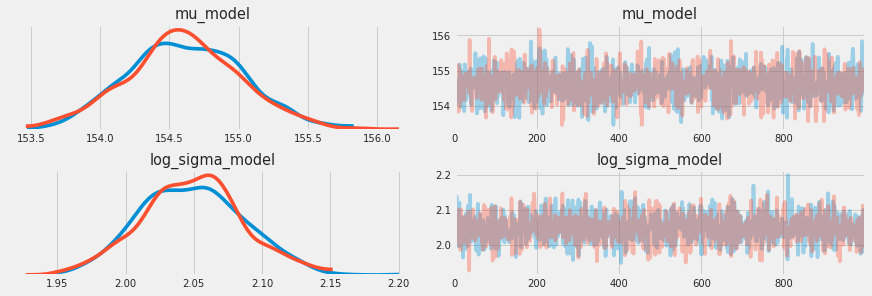

In [36]:
az.plot_trace(trace_4_1_logsigma)

### Reading the data again

In [37]:
url = 'https://raw.githubusercontent.com/pymc-devs/resources/master/Rethinking/Data/Howell1.csv'
d = pd.read_csv(url,sep=';', header=0)
display(d.head(5))
d2 = d[d.age >= 18].copy()
print(d.shape)
print(d2.shape)

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


(544, 4)
(352, 4)


### Code 4.37

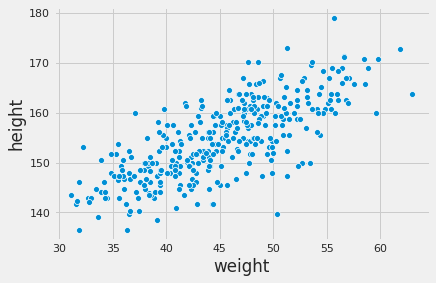

In [38]:
fig,ax = plt.subplots(1,1,figsize = (6,4))
sns.scatterplot(d2.weight,d2.height,ax=ax)
fig.show()

### Code 4.38

In [39]:
with pm.Model() as m4_3:
  sigma_model = pm.Uniform('sigma_model',0,50)
  a = pm.Normal('a',mu= 178, sigma= 100)
  b = pm.Normal('b',mu= 0, sigma= 10)
  mu_model = a + b * d2.weight
  # mu_model = pm.Deterministic('mu_model', a + b * d2.weight)
  height = pm.Normal('height', mu = mu_model, sigma= sigma_model, observed = d2.height)
  trace_4_3 = pm.sample(1000 , tune= 1000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [b, a, sigma_model]
Sampling chain 1, 0 divergences: 100%|██████████| 2000/2000 [00:05<00:00, 335.27it/s]


In [40]:
df_trace_4_3 = pm.trace_to_dataframe(trace_4_3)
df_trace_4_3.head()

,a,b,sigma_model
0,114.009387,0.898695,5.192097
1,114.997085,0.880116,4.925173
2,115.216437,0.878727,5.028997
3,115.649176,0.865181,5.002596
4,115.858088,0.863552,5.119271


### Code 4.40

In [41]:
az.summary(trace_4_3, hdi_prob= 0.89).iloc[:,0:4]

,mean,sd,hdi_5.5%,hdi_94.5%
a,113.883,1.928,110.955,117.129
b,0.905,0.042,0.833,0.967
sigma_model,5.111,0.199,4.807,5.426


### Code 4.41

In [42]:
pd.merge(az.summary(trace_4_3, hdi_prob= 0.89).iloc[:,0:4],df_trace_4_3.corr(),left_index=True,right_index=True)

,mean,sd,hdi_5.5%,hdi_94.5%,a,b,sigma_model
a,113.883,1.928,110.955,117.129,1.000000,-0.990055,-0.039629
b,0.905,0.042,0.833,0.967,-0.990055,1.000000,0.038604
sigma_model,5.111,0.199,4.807,5.426,-0.039629,0.038604,1.000000


### Code 4.42

In [43]:
d2['weight_c'] = d2.weight.subtract(d2.weight.mean())
d2.head()

,height,weight,age,male,weight_c
0,151.765,47.825606,63.0,1,2.835121
1,139.700,36.485807,63.0,0,-8.504679
2,136.525,31.864838,65.0,0,-13.125648
3,156.845,53.041915,41.0,1,8.051429
4,145.415,41.276872,51.0,0,-3.713614


### Code 4.44

In [44]:
with pm.Model() as m4_4:
  sigma_model = pm.Uniform('sigma_model',0,50)
  a = pm.Normal('a',mu= 178, sigma= 100)
  b = pm.Normal('b',mu= 0, sigma= 10)
  mu_model = a + b * d2.weight_c
  #mu_model = pm.Deterministic('mu_model', a + b * d2.weight)
  height = pm.Normal('height', mu = mu_model, sigma= sigma_model, observed = d2.height)
  trace_4_4 = pm.sample(1000 , tune= 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [b, a, sigma_model]
Sampling chain 1, 0 divergences: 100%|██████████| 2000/2000 [00:01<00:00, 1158.06it/s]


In [45]:
df_trace_4_4 = pm.trace_to_dataframe(trace_4_4)
pd.merge(az.summary(trace_4_4, hdi_prob= 0.89).iloc[:,0:4],df_trace_4_4.corr(),left_index=True,right_index=True)

,mean,sd,hdi_5.5%,hdi_94.5%,a,b,sigma_model
a,154.600,0.278,154.142,155.013,1.000000,0.030555,-0.049193
b,0.905,0.042,0.839,0.970,0.030555,1.000000,0.001794
sigma_model,5.098,0.196,4.786,5.397,-0.049193,0.001794,1.000000


In [46]:
df_trace_4_4.head()

,a,b,sigma_model
0,154.632206,0.891299,4.790267
1,154.530691,0.898824,4.922488
2,154.524020,0.875758,4.871134
3,154.417199,0.963845,5.461658
4,155.017088,0.872994,4.768642


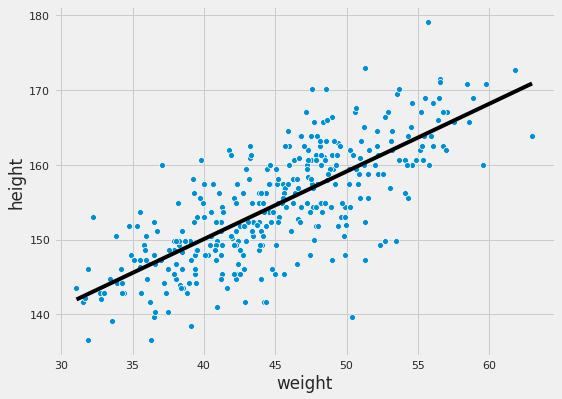

In [47]:
fig,axs = plt.subplots(1,1,figsize = (8,6))
sns.scatterplot(d2.weight,d2.height,ax= axs)
sns.lineplot(d2.weight,df_trace_4_3.a.mean() + df_trace_4_3.b.mean()* d2.weight,ax= axs, color = 'black')
axs.set_xlabel('weight')
axs.set_ylabel('height')
fig.show()

### Code 4.48 and 4.49 
#### Figure 4.5

In [48]:
d2.shape

(352, 5)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [b, a, sigma_model]
Sampling chain 1, 1 divergences: 100%|██████████| 2000/2000 [00:04<00:00, 447.72it/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [b, a, sigma_model]
Sampling chain 1, 0 divergences: 100%|██████████| 2000/2000 [00:05<00:00, 381.98it/s]
The acceptance probability does not match the target. It is 0.8807230543977845, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8855510161603203, but should be close to 0.8. Try to increase the number of tuning steps.
Aut

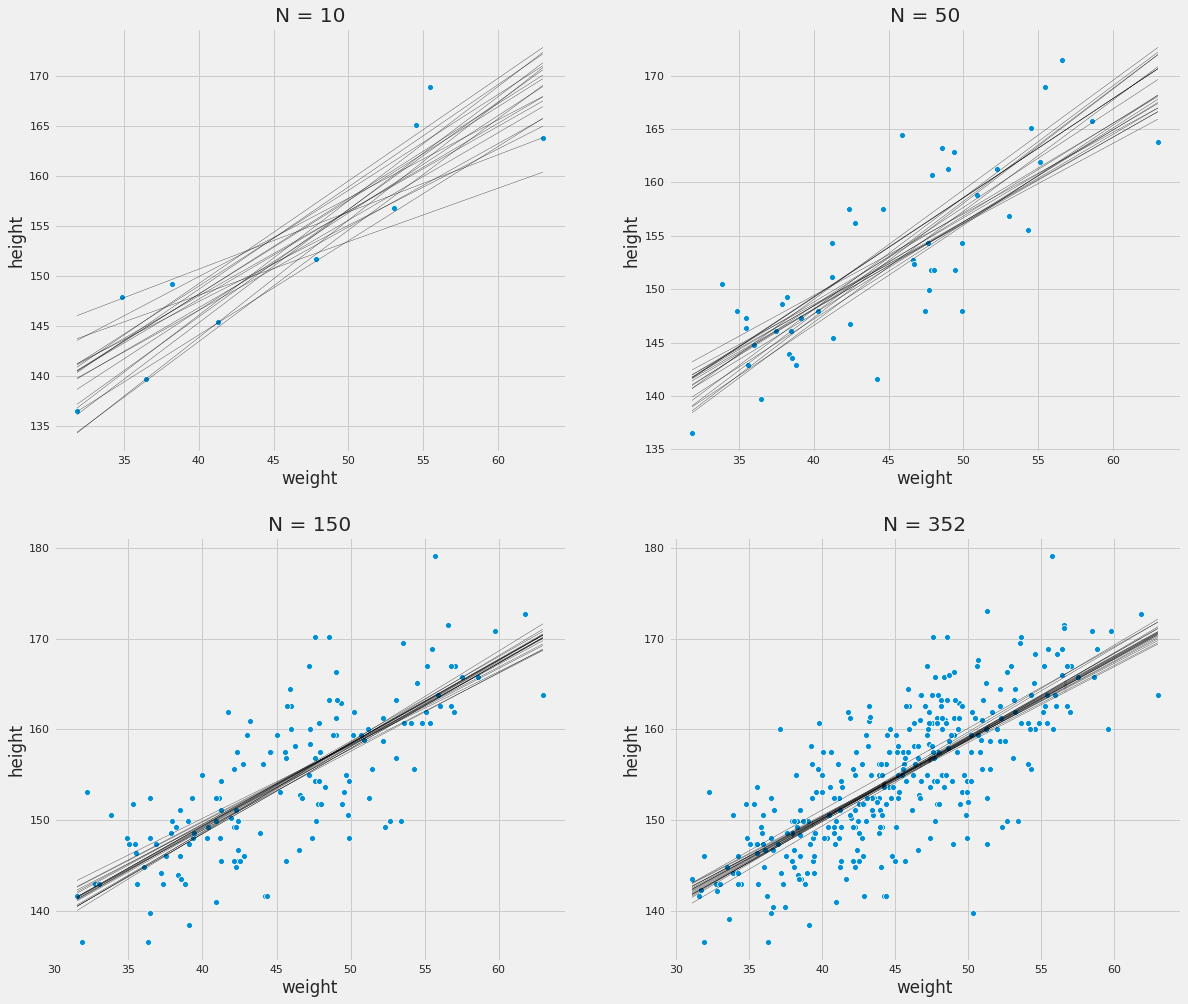

In [49]:
N = [10,50,150,352]
fig, axs = plt.subplots(2,2, figsize = (18,16))
for i,n in enumerate(N):
  dN = d2.iloc[:n].copy()
  with pm.Model() as m_N:
    sigma_model = pm.Uniform('sigma_model',0,50)
    a = pm.Normal('a',mu= 178, sigma= 100)
    b = pm.Normal('b',mu= 0, sigma= 10)
    mu_model = a + b * dN.weight
    #mu_model = pm.Deterministic('mu_model', a + b * dN.weight)
    height = pm.Normal('height', mu = mu_model, sigma= sigma_model, observed = dN.height)
    trace_N = pm.sample(1000 , tune= 1000)
    chain_N = trace_N[100:]
    sns.scatterplot(dN.weight, dN.height, ax = axs[i//2][i%2])
    for _ in range(20):
      idx = np.random.randint(len(trace_N))
      sns.lineplot(dN.weight, chain_N['a'][idx] + chain_N['b'][idx] * dN.weight, ax= axs[i//2][i%2], color = 'black', linewidth = 0.3)
    axs[i//2][i%2].set_xlabel('weight')
    axs[i//2][i%2].set_ylabel('height')
    axs[i//2][i%2].set_title('N = {N}'.format(N = n))
fig.show()


### Code 4.51

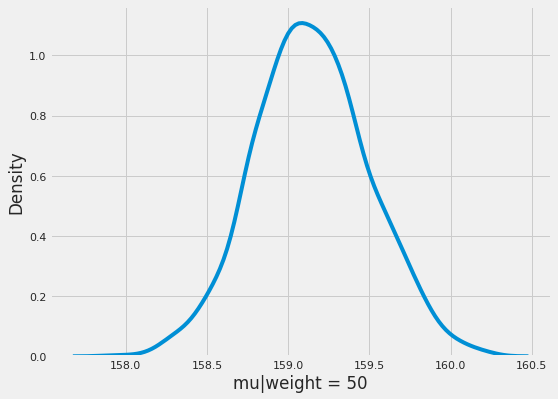

In [50]:
mu_at_50 = trace_N['a'] + trace_N['b'] * 50
fig,axs = plt.subplots(1,1, figsize = (8,6))
sns.kdeplot(mu_at_50, ax= axs)
axs.set_xlabel('mu|weight = 50')
axs.set_ylabel('Density')
fig.show()

### Code 4.52

In [51]:
az.hdi(mu_at_50, hdi_prob= 0.89)

array([158.63063914, 159.75980482])

### Code 4.53

In [52]:
N = [352]
for i,n in enumerate(N):
  dN = d2.iloc[:n].copy()
  with pm.Model() as m_N:
    sigma_model = pm.Uniform('sigma_model',0,50)
    a = pm.Normal('a',mu= 178, sigma= 100)
    b = pm.Normal('b',mu= 0, sigma= 10)
    mu_model = pm.Deterministic('mu_model', a + b * dN.weight)
    height = pm.Normal('height', mu = mu_model, sigma= sigma_model, observed = dN.height)
    trace_N = pm.sample(1000 , tune= 1000)
    chain_N = trace_N[100:]
df_chain_N = pm.trace_to_dataframe(chain_N)
df_chain_N.filter(regex=('mu.*')).head()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [b, a, sigma_model]
Sampling chain 1, 0 divergences: 100%|██████████| 2000/2000 [00:06<00:00, 306.83it/s]


,mu_model__0,mu_model__1,mu_model__2,mu_model__3,mu_model__4,mu_model__5,mu_model__6,mu_model__7,mu_model__8,mu_model__9,mu_model__10,mu_model__11,mu_model__12,mu_model__13,mu_model__14,mu_model__15,mu_model__16,mu_model__17,mu_model__18,mu_model__19,mu_model__20,mu_model__21,mu_model__22,mu_model__23,mu_model__24,mu_model__25,mu_model__26,mu_model__27,mu_model__28,mu_model__29,mu_model__30,mu_model__31,mu_model__32,mu_model__33,mu_model__34,mu_model__35,mu_model__36,mu_model__37,mu_model__38,mu_model__39,...,mu_model__312,mu_model__313,mu_model__314,mu_model__315,mu_model__316,mu_model__317,mu_model__318,mu_model__319,mu_model__320,mu_model__321,mu_model__322,mu_model__323,mu_model__324,mu_model__325,mu_model__326,mu_model__327,mu_model__328,mu_model__329,mu_model__330,mu_model__331,mu_model__332,mu_model__333,mu_model__334,mu_model__335,mu_model__336,mu_model__337,mu_model__338,mu_model__339,mu_model__340,mu_model__341,mu_model__342,mu_model__343,mu_model__344,mu_model__345,mu_model__346,mu_model__347,mu_model__348,mu_model__349,mu_model__350,mu_model__351
0,157.040821,146.618729,142.371726,161.834984,151.022063,170.980370,148.234153,164.075734,145.133581,163.163801,158.942853,150.969952,146.201845,156.925380,144.195592,157.718257,151.986106,148.338374,158.109086,152.350880,145.706796,147.921490,145.680740,150.136185,163.737016,147.556717,148.468650,155.920446,148.781313,145.784961,156.649993,157.092932,158.499914,158.473859,165.065833,149.041865,158.942853,150.996008,148.520761,152.054298,...,156.545772,155.477507,156.649993,150.631234,159.359737,154.565574,151.907941,151.360781,154.643740,160.193504,158.369638,160.141394,153.393089,145.732851,152.500434,156.076778,151.569223,148.194196,152.881463,162.382144,152.585377,149.641136,152.924095,161.496266,148.416540,152.429045,146.071569,153.731807,148.077822,153.627586,153.549420,157.092932,149.302418,150.813621,150.605179,156.311275,144.560365,161.027272,162.772972,161.365990
1,157.582079,146.803602,142.411373,162.540178,151.357508,171.998291,148.474266,164.857550,145.267669,163.914434,159.549151,151.303616,146.372463,157.462690,144.297606,158.282680,152.354518,148.582051,158.686873,152.731764,145.860485,148.150912,145.833539,150.441338,164.507250,147.773665,148.716782,156.423392,149.040136,145.941324,157.177886,157.635971,159.091065,159.064119,165.881506,149.309598,159.549151,151.330562,148.770674,152.425041,...,157.070101,155.965307,157.177886,150.953316,159.980290,155.022191,152.273679,151.707809,155.103029,160.842568,158.956334,160.788675,153.809612,145.887432,152.886433,156.585070,151.923379,148.432943,153.280491,163.106048,152.974280,149.929360,153.324580,162.189877,148.662889,152.812603,146.237732,154.159912,148.312589,154.052128,153.971289,157.635971,149.579060,151.141939,150.926369,156.827585,144.674853,161.704846,163.510241,162.055146
2,156.989059,147.284996,143.330591,161.452927,151.384963,169.968242,148.789126,163.539301,145.902167,162.690195,158.760050,151.336442,146.896834,156.881571,145.028802,157.619823,152.282588,148.886167,157.983725,152.622231,146.435891,148.498004,146.411631,150.560117,163.223919,148.158362,149.007467,155.945872,149.298589,146.508671,156.625156,157.037579,158.347627,158.323367,164.461187,149.541191,158.760050,151.360702,149.055988,152.346082,...,156.528116,155.533449,156.625156,151.021060,159.148212,154.684344,152.209808,151.700345,154.757124,159.924537,158.226327,159.876017,153.592637,146.460151,152.761482,156.091433,151.894426,148.751922,153.116259,161.962390,152.840572,150.099174,153.155954,161.137545,148.958947,152.695011,146.775533,153.908019,148.643565,153.810978,153.738198,157.037579,149.783792,151.190881,150.996800,156.309774,145.368444,160.700862,162.326293,161.016244
3,156.604375,146.884191,142.923216,161.075659,150.990969,169.605120,148.390819,163.165499,145.499065,162.314983,158.378308,150.942368,146.495384,156.496708,144.624248,157.236187,151.890086,148.488021,157.600693,152.230292,146.033675,148.099214,146.009374,150.164753,1

In [53]:
df_chain_N.head()

,a,b,sigma_model,mu_model__0,mu_model__1,mu_model__2,mu_model__3,mu_model__4,mu_model__5,mu_model__6,mu_model__7,mu_model__8,mu_model__9,mu_model__10,mu_model__11,mu_model__12,mu_model__13,mu_model__14,mu_model__15,mu_model__16,mu_model__17,mu_model__18,mu_model__19,mu_model__20,mu_model__21,mu_model__22,mu_model__23,mu_model__24,mu_model__25,mu_model__26,mu_model__27,mu_model__28,mu_model__29,mu_model__30,mu_model__31,mu_model__32,mu_model__33,mu_model__34,mu_model__35,mu_model__36,...,mu_model__312,mu_model__313,mu_model__314,mu_model__315,mu_model__316,mu_model__317,mu_model__318,mu_model__319,mu_model__320,mu_model__321,mu_model__322,mu_model__323,mu_model__324,mu_model__325,mu_model__326,mu_model__327,mu_model__328,mu_model__329,mu_model__330,mu_model__331,mu_model__332,mu_model__333,mu_model__334,mu_model__335,mu_model__336,mu_model__337,mu_model__338,mu_model__339,mu_model__340,mu_model__341,mu_model__342,mu_model__343,mu_model__344,mu_model__345,mu_model__346,mu_model__347,mu_model__348,mu_model__349,mu_model__350,mu_model__351
0,113.085646,0.919072,5.107854,157.040821,146.618729,142.371726,161.834984,151.022063,170.980370,148.234153,164.075734,145.133581,163.163801,158.942853,150.969952,146.201845,156.925380,144.195592,157.718257,151.986106,148.338374,158.109086,152.350880,145.706796,147.921490,145.680740,150.136185,163.737016,147.556717,148.468650,155.920446,148.781313,145.784961,156.649993,157.092932,158.499914,158.473859,165.065833,149.041865,158.942853,...,156.545772,155.477507,156.649993,150.631234,159.359737,154.565574,151.907941,151.360781,154.643740,160.193504,158.369638,160.141394,153.393089,145.732851,152.500434,156.076778,151.569223,148.194196,152.881463,162.382144,152.585377,149.641136,152.924095,161.496266,148.416540,152.429045,146.071569,153.731807,148.077822,153.627586,153.549420,157.092932,149.302418,150.813621,150.605179,156.311275,144.560365,161.027272,162.772972,161.365990
1,112.123854,0.950500,5.135023,157.582079,146.803602,142.411373,162.540178,151.357508,171.998291,148.474266,164.857550,145.267669,163.914434,159.549151,151.303616,146.372463,157.462690,144.297606,158.282680,152.354518,148.582051,158.686873,152.731764,145.860485,148.150912,145.833539,150.441338,164.507250,147.773665,148.716782,156.423392,149.040136,145.941324,157.177886,157.635971,159.091065,159.064119,165.881506,149.309598,159.549151,...,157.070101,155.965307,157.177886,150.953316,159.980290,155.022191,152.273679,151.707809,155.103029,160.842568,158.956334,160.788675,153.809612,145.887432,152.886433,156.585070,151.923379,148.432943,153.280491,163.106048,152.974280,149.929360,153.324580,162.189877,148.662889,152.812603,146.237732,154.159912,148.312589,154.052128,153.971289,157.635971,149.579060,151.141939,150.926369,156.827585,144.674853,161.704846,163.510241,162.055146
2,116.062176,0.855753,5.097406,156.989059,147.284996,143.330591,161.452927,151.384963,169.968242,148.789126,163.539301,145.902167,162.690195,158.760050,151.336442,146.896834,156.881571,145.028802,157.619823,152.282588,148.886167,157.983725,152.622231,146.435891,148.498004,146.411631,150.560117,163.223919,148.158362,149.007467,155.945872,149.298589,146.508671,156.625156,157.037579,158.347627,158.323367,164.461187,149.541191,158.760050,...,156.528116,155.533449,156.625156,151.021060,159.148212,154.684344,152.209808,151.700345,154.757124,159.924537,158.226327,159.876017,153.592637,146.460151,152.761482,156.091433,151.894426,148.751922,153.116259,161.962390,152.840572,150.099174,153.155954,161.137545,148.958947,152.695011,146.775533,153.908019,148.643565,153.810978,153.738198,157.037579,149.783792,151.190881,150.996800,156.309774,145.368444,160.700862,162.326293,161.016244
3,115.609500,0.857174,5.097254,156.604375,146.884191,142.923216,161.075659,150.990969,169.605120,148.390819,163.165499,145.499065,162.314983,158.378308,150.942368,146.495384,156.496708,144.624248,157.236187,151.890086,148.488021,157.600693,152.230292,146.033675,148.099214,146.009374,150.164753,162.849

### Code 4.54

In [54]:
weight_seq = np.arange(25,71)
thinned_chain_N = chain_N[::10]
mu_pred = np.zeros((len(weight_seq),len(thinned_chain_N)*thinned_chain_N.nchains))
for index,weight in enumerate(weight_seq):
  mu_pred[index] = thinned_chain_N['a'] + thinned_chain_N['b'] * weight

### Code 4.56

In [55]:
mu_mean = mu_pred.mean(axis=1)
mu_hpdi = az.hdi(mu_pred.T, hdi_prob= 0.89)

/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (180) than draws (46). Passed array should have shape (chains, draws, *shape)
  UserWarning,


### Code 4.55 and Code 4.57

/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (180) than draws (46). Passed array should have shape (chains, draws, *shape)
  UserWarning,


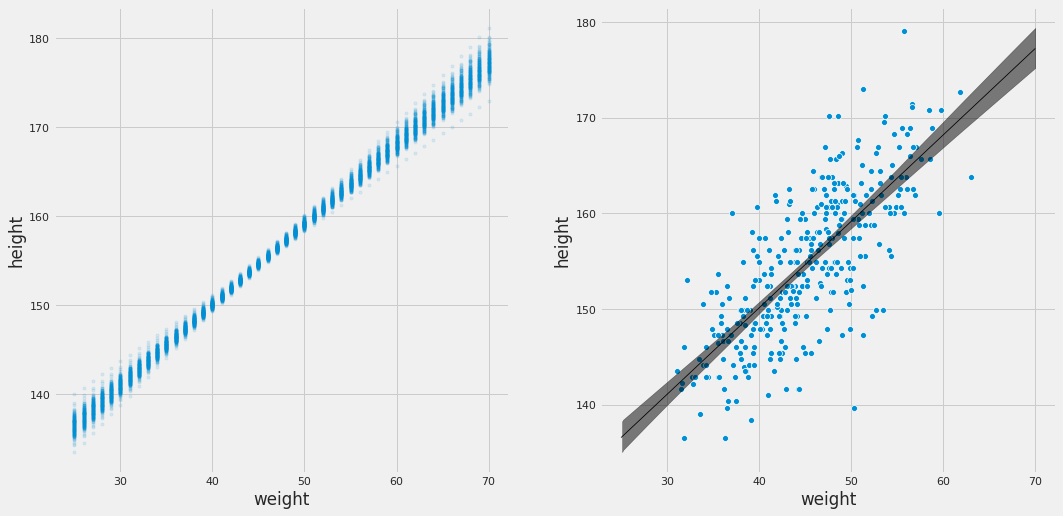

In [56]:
fig,axs = plt.subplots(1,2, figsize = (16,8))
axs[0].plot(weight_seq, mu_pred, 'C0.', alpha=0.1)
axs[0].set_xlabel('weight')
axs[0].set_ylabel('height')
sns.lineplot(weight_seq, mu_mean, ax= axs[1], linewidth = 0.8, color = 'black')
sns.scatterplot(d2.weight,d2.height, ax = axs[1],marker="o")
az.plot_hpd(weight_seq, mu_pred.T, ax= axs[1],color ='black')
fig.show()

### Code 4.59

In [57]:
height_pred = pm.sample_posterior_predictive(chain_N,200,m_N)

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 200/200 [00:00<00:00, 200.29it/s]


### Code 4.60

In [58]:
height_pred_hpd=az.hdi(height_pred['height'], hdi_prob=0.89)

### Code 4.61

/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (180) than draws (46). Passed array should have shape (chains, draws, *shape)
  UserWarning,


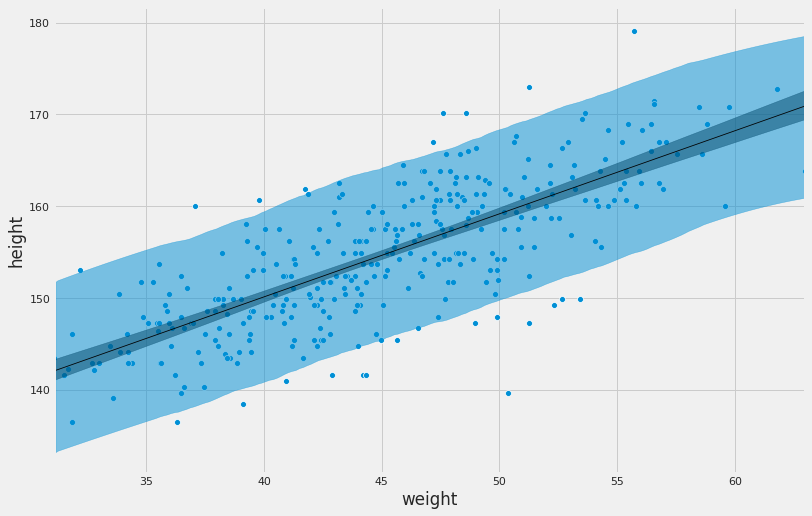

In [59]:
fig,axs = plt.subplots(1,1, figsize = (12,8))
sns.lineplot(weight_seq, mu_mean, ax= axs, linewidth = 0.8, color = 'black')
sns.scatterplot(d2.weight,d2.height, ax = axs,marker="o")
az.plot_hpd(weight_seq, mu_pred.T, ax= axs,color ='black')
az.plot_hpd(dN.weight , height_pred['height'], ax= axs, color ='C0')
axs.set_xlim(dN.weight.min(), dN.weight.max())
fig.show()

### Code 4.62

In [60]:
weight_seq = np.arange(25,71)
post_samples =[]
for _ in range(1000):
  idx = np.random.randint(len(chain_N))
  mu_pr = chain_N['a'][idx] + chain_N['b'][idx]*weight_seq
  sigma_pr =chain_N['sigma_model'][idx]
  height_pred = np.random.normal(mu_pr, sigma_pr)
  post_samples.append(height_pred)

/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (180) than draws (46). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (1000) than draws (46). Passed array should have shape (chains, draws, *shape)
  UserWarning,


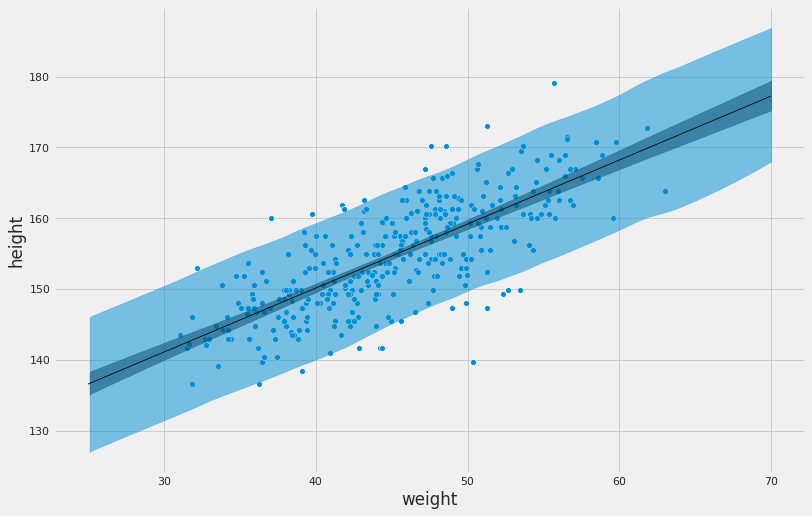

In [61]:
fig,axs = plt.subplots(1,1, figsize = (12,8))
sns.lineplot(weight_seq, mu_mean, ax= axs, linewidth = 0.8, color = 'black')
sns.scatterplot(d2.weight,d2.height, ax = axs,marker="o")
az.plot_hpd(weight_seq, mu_pred.T, ax= axs,color ='black')
az.plot_hpd(weight_seq , post_samples, ax= axs, color ='C0')
fig.show()

### Code 4.64 and Code 4.65

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


,height,weight,age,male,std_weight,std_wieght_square,std_wieght_cube
0,151.765,47.825606,63.0,1,0.830633,0.689951,0.573096
1,139.700,36.485807,63.0,0,0.059514,0.003542,0.000211
2,136.525,31.864838,65.0,0,-0.254717,0.064881,-0.016526
3,156.845,53.041915,41.0,1,1.185347,1.405049,1.665471
4,145.415,41.276872,51.0,0,0.385312,0.148465,0.057205


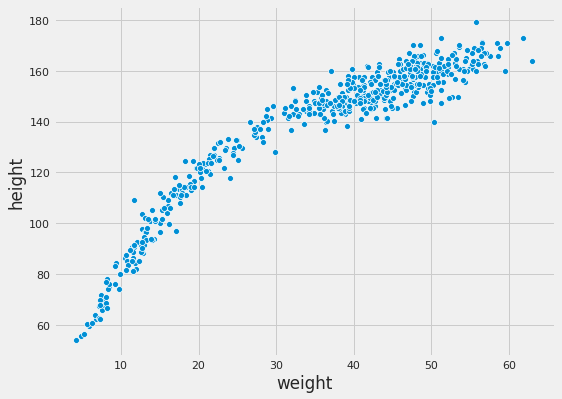

In [62]:
url = 'https://raw.githubusercontent.com/pymc-devs/resources/master/Rethinking/Data/Howell1.csv'
d = pd.read_csv(url,sep=';', header=0)
display(d.head(5))

fig,axs = plt.subplots(1,1, figsize = (8,6))
sns.scatterplot(d.weight, d.height,ax= axs)
fig.show()
weight_standard_scaler = StandardScaler()
d['std_weight'] = weight_standard_scaler.fit_transform(d.weight.values.reshape(-1,1))
d['std_wieght_square'] = d.std_weight.pow(2)
d['std_wieght_cube'] = d.std_weight.pow(3)
display(d.head())

### Code 4.66

In [63]:
with pm.Model() as m4_5:
  ### This is an quadratic model
  sigma_model = pm.Uniform('sigma_model',0,50)
  a = pm.Normal('a',mu= 178, sigma= 100)
  b1 = pm.Normal('b1',mu= 0, sigma= 10)
  b2 = pm.Normal('b2',mu= 0, sigma= 10)
  mu_model = pm.Deterministic('mu_model', a + b1 * d.std_weight + b2 * d.std_wieght_square )
  height = pm.Normal('height', mu = mu_model, sigma= sigma_model, observed = d.height)
  trace_m4_5 = pm.sample(1000 , tune= 1000)
  chain_m4_5 = trace_m4_5[100:]

height_predicted_m4_5 = pm.sample_posterior_predictive(trace_m4_5,1000, m4_5)
mu_pred = trace_m4_5['mu_model']

with pm.Model() as m4_6:
  ### This is an linear model
  sigma_model = pm.Uniform('sigma_model',0,50)
  a = pm.Normal('a',mu= 178, sigma= 100)
  b1 = pm.Normal('b1',mu= 0, sigma= 10)
  mu_model = pm.Deterministic('mu_model', a + b1 * d.std_weight )
  height = pm.Normal('height', mu = mu_model, sigma= sigma_model, observed = d.height)
  trace_m4_6 = pm.sample(1000 , tune= 1000)
  chain_m4_6 = trace_m4_6[100:]

height_predicted_m4_6 = pm.sample_posterior_predictive(trace_m4_6,1000, m4_6)
mu_pred = trace_m4_6['mu_model']

std_weight_stacked = np.vstack((d.std_weight, d.std_weight**2, d.std_weight**3))
with pm.Model() as m4_7:
  ### This is an quadratic model
  sigma_model = pm.Uniform('sigma_model',0,50)
  a = pm.Normal('a',mu= 178, sigma= 100)
  beta = pm.Normal('beta',mu= 0, sigma= 10,shape=3)
  mu_model = pm.Deterministic('mu_model', a + pm.math.dot(beta,std_weight_stacked))
  height = pm.Normal('height', mu = mu_model, sigma= sigma_model, observed = d.height)
  trace_m4_7 = pm.sample(1000 , tune= 1000)
  chain_m4_7 = trace_m4_7[100:]
height_predicted_m4_7 = pm.sample_posterior_predictive(trace_m4_7,1000, m4_7)
mu_pred = trace_m4_7['mu_model']


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [b2, b1, a, sigma_model]
Sampling chain 1, 0 divergences: 100%|██████████| 2000/2000 [00:02<00:00, 770.70it/s]
/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 1000/1000 [00:01<00:00, 717.10it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [b1, a, sigma_model]
Sampling chain 1, 0 divergences: 100%|██████████| 2000/2000 [00:01<00:00, 1082.70it/s]
/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the r

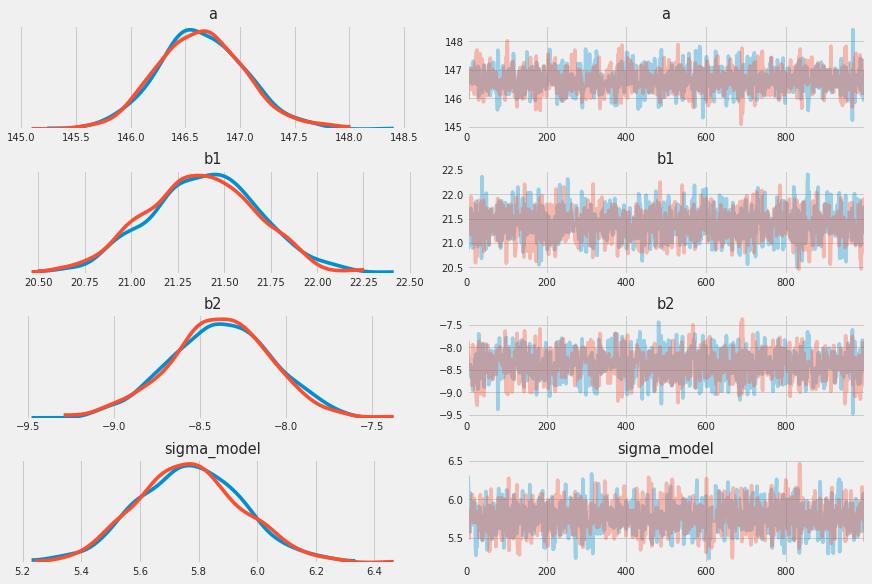

In [64]:
varnames = ['~mu_model']
az.plot_trace(trace_m4_5,varnames);

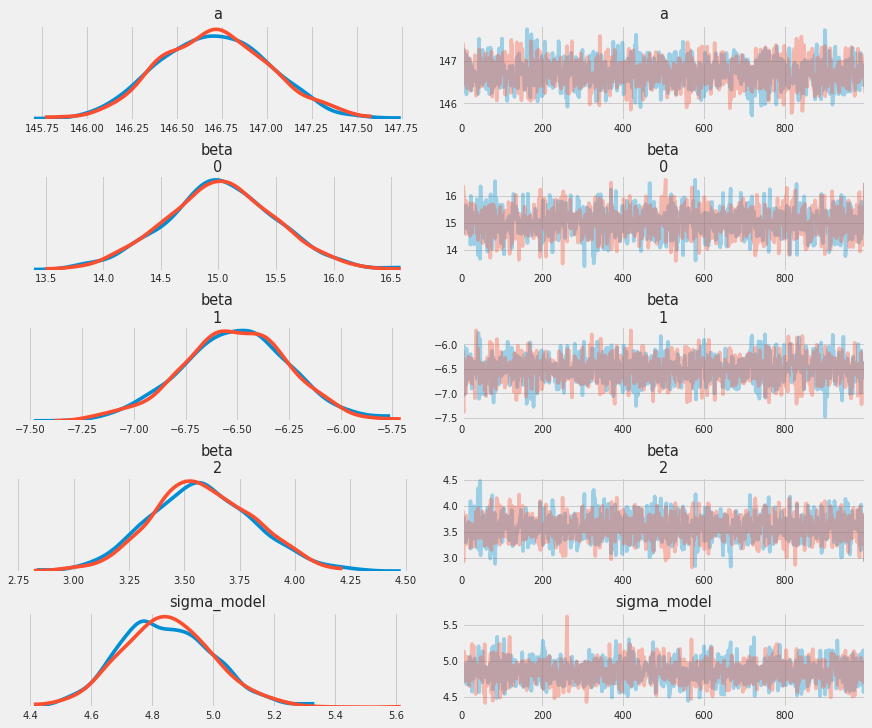

In [65]:
varnames = ['~mu_model']
az.plot_trace(trace_m4_7,varnames);

### Code 4.67

In [66]:
display(az.summary(trace_m4_5,varnames, hdi_prob= 0.89))
display(az.summary(trace_m4_6,varnames, hdi_prob= 0.89))
display(az.summary(trace_m4_7,varnames, hdi_prob= 0.89))

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,146.647,0.399,146.004,147.245,0.012,0.009,1063.0,1063.0,1060.0,1252.0,1.0
b1,21.385,0.301,20.929,21.872,0.008,0.006,1282.0,1282.0,1285.0,1338.0,1.0
b2,-8.384,0.298,-8.881,-7.927,0.009,0.007,1022.0,1019.0,1022.0,1166.0,1.0
sigma_model,5.771,0.183,5.463,6.039,0.005,0.004,1332.0,1332.0,1325.0,1238.0,1.0


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,138.263,0.418,137.568,138.897,0.008,0.006,2876.0,2876.0,2874.0,1317.0,1.0
b1,25.890,0.398,25.251,26.500,0.008,0.006,2482.0,2480.0,2486.0,1618.0,1.0
sigma_model,9.384,0.288,8.911,9.817,0.006,0.004,2612.0,2612.0,2590.0,1559.0,1.0


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,146.710,0.313,146.205,147.192,0.009,0.006,1253.0,1253.0,1245.0,1154.0,1.0
beta[0],15.019,0.492,14.195,15.776,0.014,0.010,1321.0,1318.0,1327.0,1196.0,1.0
beta[1],-6.509,0.259,-6.926,-6.101,0.007,0.005,1295.0,1295.0,1288.0,1142.0,1.0
beta[2],3.582,0.235,3.241,3.983,0.006,0.005,1327.0,1323.0,1330.0,1222.0,1.0
sigma_model,4.849,0.152,4.620,5.094,0.004,0.003,1585.0,1576.0,1606.0,1097.0,1.0


### This is an example

/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (2000) than draws (544). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (1000) than draws (544). Passed array should have shape (chains, draws, *shape)
  UserWarning,


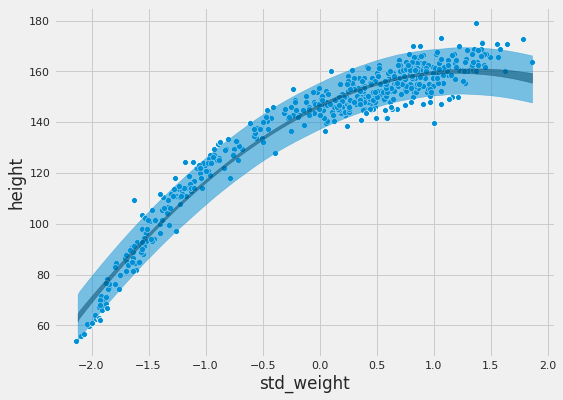

In [67]:
fig,axs = plt.subplots(1,1, figsize = (8,6))
sns.scatterplot(d.std_weight,d.height, ax= axs)
az.plot_hdi(d.std_weight,trace_m4_5['mu_model'],hdi_prob= 0.89, color = 'black')
az.plot_hdi(d.std_weight, height_predicted_m4_5['height'], hdi_prob= 0.89, color= 'C0')
fig.show()

### Code 4.68 and 4.70

In [68]:
weight_seq = np.linspace(-2.2,2,30)

weight_seq_stacked = np.vstack((weight_seq, weight_seq**2, weight_seq**3))

height_sample_m4_5 = []
mu_pred_sample_m4_5 =[]
for _ in range(1000):
  idx = np.random.randint(len(chain_m4_5))
  mu_pred_m4_5 = chain_m4_5['a'][idx] + chain_m4_5['b1'][idx]*weight_seq + chain_m4_5['b2'][idx]*np.power(weight_seq,2)
  height_pred_m4_5 = np.random.normal(mu_pred_m4_5,chain_m4_5['sigma_model'][idx])
  height_sample_m4_5.append(height_pred_m4_5)
  mu_pred_sample_m4_5.append(mu_pred_m4_5)

height_sample_m4_6 = []
mu_pred_sample_m4_6 =[]
for _ in range(1000):
  idx = np.random.randint(len(chain_m4_6))
  mu_pred_m4_6 = chain_m4_6['a'][idx] + chain_m4_6['b1'][idx]*weight_seq 
  height_pred_m4_6 = np.random.normal(mu_pred_m4_6,chain_m4_6['sigma_model'][idx])
  height_sample_m4_6.append(height_pred_m4_6)
  mu_pred_sample_m4_6.append(mu_pred_m4_6)


height_sample_m4_7 = []
mu_pred_sample_m4_7 =[]
for _ in range(1000):
  idx = np.random.randint(len(chain_m4_7))
  mu_pred_m4_7 = chain_m4_7['a'][idx] + np.dot(chain_m4_7['beta'][idx], weight_seq_stacked)
  height_pred_m4_7 = np.random.normal(mu_pred_m4_7,chain_m4_7['sigma_model'][idx])
  height_sample_m4_7.append(height_pred_m4_7)
  mu_pred_sample_m4_7.append(mu_pred_m4_7)


### Code 4.69 and 4.71

/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (1000) than draws (30). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (1000) than draws (30). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (1000) than draws (30). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (1000) than draws (30). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (1000) than draws (30). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (1

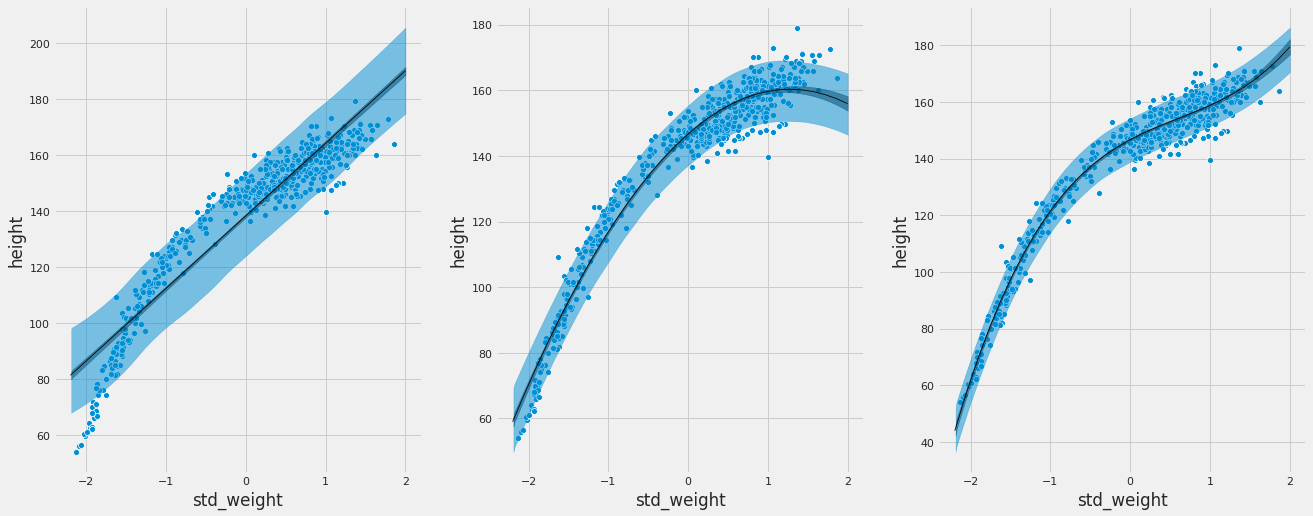

In [69]:
fig,axs = plt.subplots(1,3, figsize = (20,8))
sns.scatterplot(d.std_weight,d.height, ax= axs[0])
sns.lineplot(weight_seq, np.array(mu_pred_sample_m4_6).mean(axis=0),color = 'black', linewidth = 0.8, ax= axs[0])
az.plot_hdi(weight_seq, np.array(mu_pred_sample_m4_6), color = 'black', hdi_prob= 0.89,ax= axs[0])
az.plot_hdi(weight_seq , height_sample_m4_6, hdi_prob= 0.89, color= 'C0', ax= axs[0])

sns.scatterplot(d.std_weight,d.height, ax= axs[1])
sns.lineplot(weight_seq, np.array(mu_pred_sample_m4_5).mean(axis=0),color = 'black', linewidth = 0.8, ax= axs[1])
az.plot_hdi(weight_seq, np.array(mu_pred_sample_m4_5), color = 'black', hdi_prob= 0.89,ax= axs[1])
az.plot_hdi(weight_seq , height_sample_m4_5, hdi_prob= 0.89, color= 'C0', ax= axs[1])

sns.scatterplot(d.std_weight,d.height, ax= axs[2])
sns.lineplot(weight_seq, np.array(mu_pred_sample_m4_7).mean(axis=0),color = 'black', linewidth = 0.8, ax= axs[2])
az.plot_hdi(weight_seq, np.array(mu_pred_sample_m4_7), color = 'black', hdi_prob= 0.89,ax= axs[2])
az.plot_hdi(weight_seq , height_sample_m4_7, hdi_prob= 0.89, color= 'C0', ax= axs[2])


fig.show()

### Code 4.72

/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (1000) than draws (30). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (1000) than draws (30). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (1000) than draws (30). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (1000) than draws (30). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (1000) than draws (30). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/usr/local/lib/python3.6/dist-packages/arviz/data/base.py:146: UserWarning: More chains (1

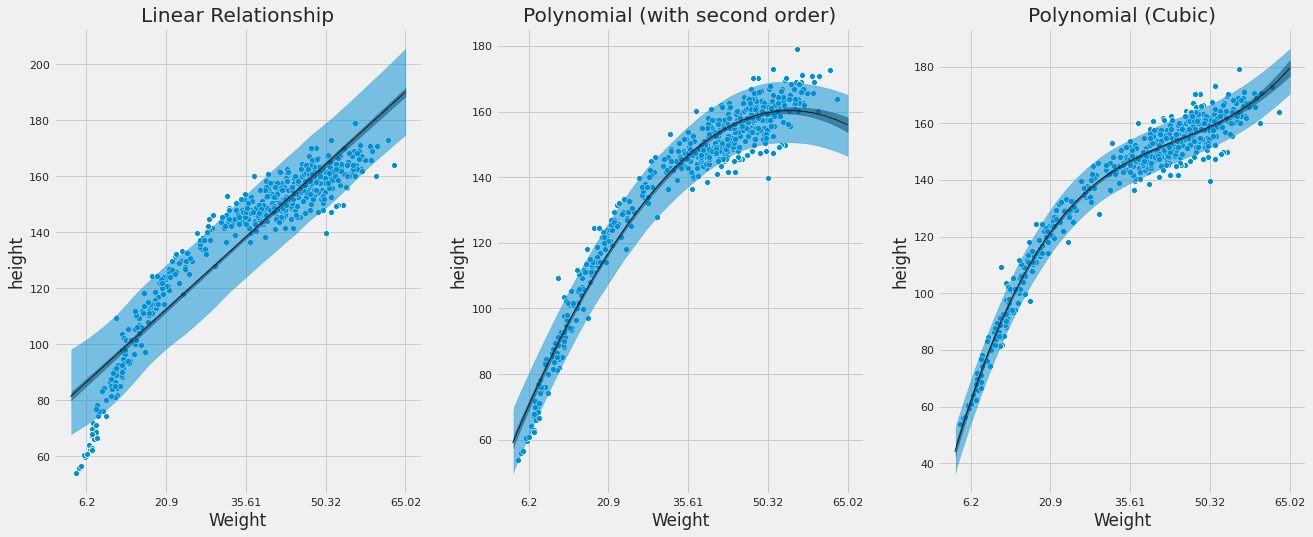

In [70]:
fig,axs = plt.subplots(1,3, figsize = (20,8))
sns.scatterplot(d.std_weight,d.height, ax= axs[0])
sns.lineplot(weight_seq, np.array(mu_pred_sample_m4_6).mean(axis=0),color = 'black', linewidth = 0.8, ax= axs[0])
az.plot_hdi(weight_seq, np.array(mu_pred_sample_m4_6), color = 'black', hdi_prob= 0.89,ax= axs[0])
az.plot_hdi(weight_seq , height_sample_m4_6, hdi_prob= 0.89, color= 'C0', ax= axs[0])

axs[0].set_xticklabels(np.round(weight_standard_scaler.inverse_transform(axs[0].get_xticks()),2))
axs[0].set_xlabel('Weight')
axs[0].set_title('Linear Relationship')


sns.scatterplot(d.std_weight,d.height, ax= axs[1])
sns.lineplot(weight_seq, np.array(mu_pred_sample_m4_5).mean(axis=0),color = 'black', linewidth = 0.8, ax= axs[1])
az.plot_hdi(weight_seq, np.array(mu_pred_sample_m4_5), color = 'black', hdi_prob= 0.89,ax= axs[1])
az.plot_hdi(weight_seq , height_sample_m4_5, hdi_prob= 0.89, color= 'C0', ax= axs[1])

axs[1].set_xticklabels(np.round(weight_standard_scaler.inverse_transform(axs[0].get_xticks()),2))
axs[1].set_xlabel('Weight')
axs[1].set_title('Polynomial (with second order)')

sns.scatterplot(d.std_weight,d.height, ax= axs[2])
sns.lineplot(weight_seq, np.array(mu_pred_sample_m4_7).mean(axis=0),color = 'black', linewidth = 0.8, ax= axs[2])
az.plot_hdi(weight_seq, np.array(mu_pred_sample_m4_7), color = 'black', hdi_prob= 0.89,ax= axs[2])
az.plot_hdi(weight_seq , height_sample_m4_7, hdi_prob= 0.89, color= 'C0', ax= axs[2])
axs[2].set_xticklabels(np.round(weight_standard_scaler.inverse_transform(axs[0].get_xticks()),2))
axs[2].set_xlabel('Weight')
axs[2].set_title('Polynomial (Cubic)')

fig.show()